In [29]:
import pandas as pd
patientData = pd.read_csv("../../data/heartdisease.csv")
patientData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [30]:
import matplotlib.pyplot as plt

In [31]:
patientData.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


(array([  1.,   0.,   0.,   0.,  12., 148., 430., 234.,  73.,  20.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

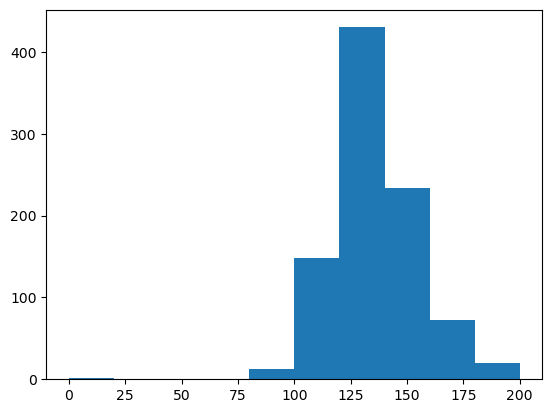

In [32]:
fig, ax = plt.subplots()
ax.hist(patientData.RestingBP)

In [33]:
import numpy as np

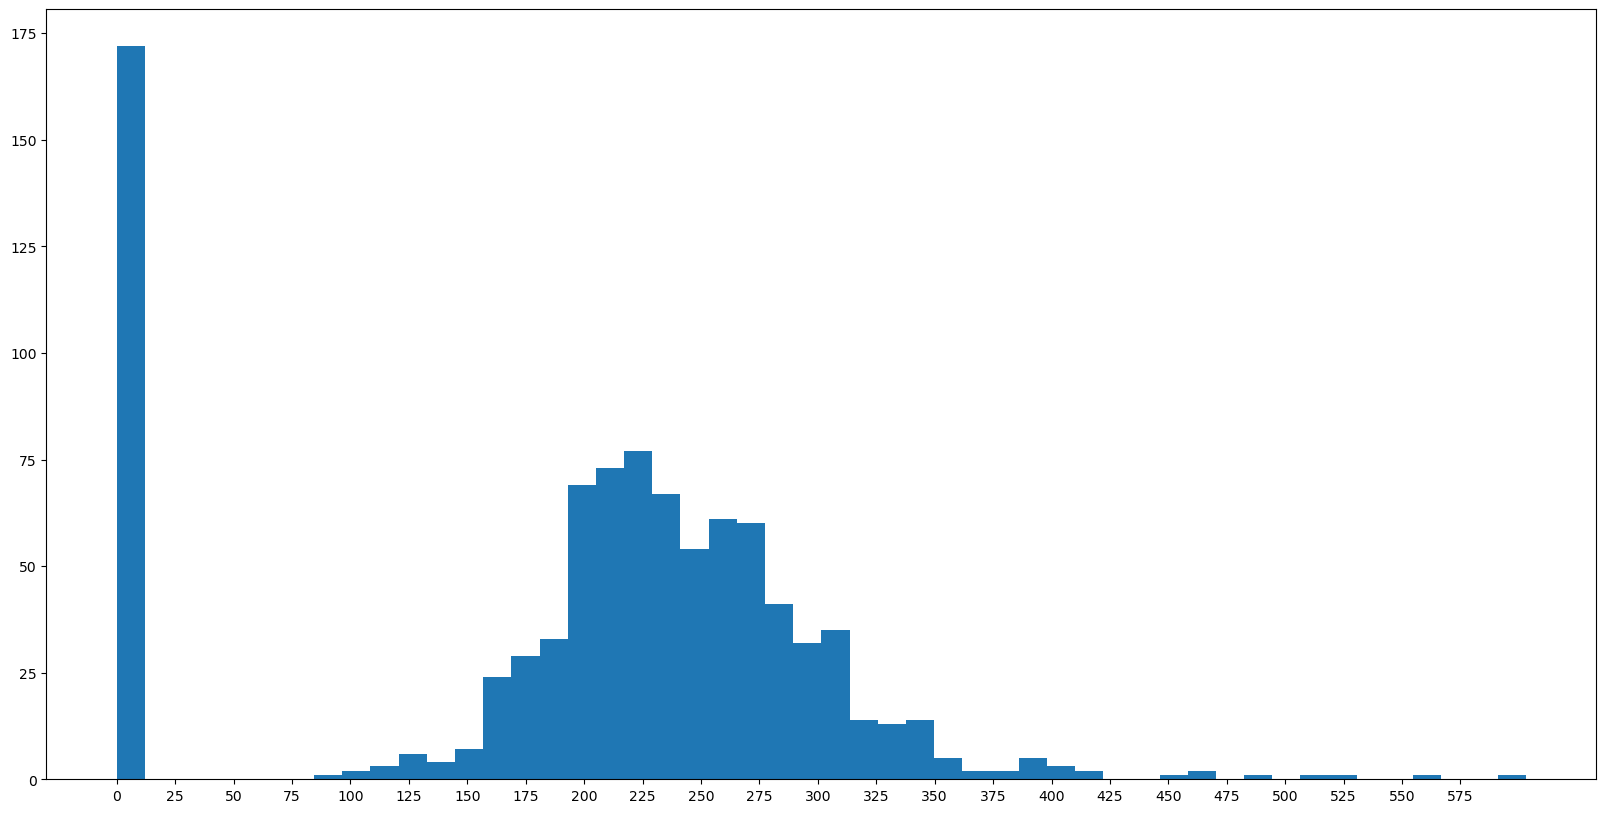

In [34]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.hist(patientData.Cholesterol, bins = 50)
ax.set(xticks = range(0,600,25));

In [35]:
patientData[(patientData.Cholesterol >= 0) & (patientData.Cholesterol < 25)].shape

(172, 12)

In [36]:
patientData[(patientData.RestingBP >= 0) & (patientData.RestingBP < 25)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [37]:
patientData.Cholesterol.std()

109.38414455220337

In [38]:
patientData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [39]:
patientData["Zscore"] = (patientData.Cholesterol - patientData.Cholesterol.mean())/patientData.Cholesterol.std()
patientData

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.824621
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.171867
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.769768
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.138964
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,-0.034736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,0.596068
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,-0.053020
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.619830
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0.340090


In [40]:
patientData[patientData["Zscore"] > 2]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Zscore
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0,2.461055
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1,2.918160
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1,3.018723
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1,2.442771
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1,3.695238
250,44,M,ASY,135,491,0,Normal,135,N,0.0,Flat,1,2.671323
496,58,M,ASY,132,458,1,Normal,69,N,1.0,Down,0,2.369634
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0,3.338696


In [41]:
patientData[patientData["Zscore"] < -1.5]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Zscore
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1,-1.817444
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1,-1.817444
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1,-1.817444
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1,-1.817444
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1,-1.817444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1,-1.817444
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0,-1.817444
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1,-1.817444
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1,-1.817444


In [42]:
patientData[(patientData.Cholesterol >= 0) & (patientData.Cholesterol < 25)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Zscore
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1,-1.817444
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1,-1.817444
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1,-1.817444
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1,-1.817444
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1,-1.817444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1,-1.817444
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0,-1.817444
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1,-1.817444
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1,-1.817444


# Test Baseline model

In [43]:
patientData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
 12  Zscore          918 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 93.4+ KB


In [44]:
import sklearn
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
modelDict = {"SVM":svm.SVC(),
             "LR":LogisticRegression(n_jobs = -1),
             "RFC":RandomForestClassifier(n_jobs = -1)}



In [45]:
patientData.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

patientData.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

patientData.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 2,
        'LVH': 3
    },
    inplace=True)

In [46]:
patientData = pd.get_dummies(patientData, drop_first=True)
patientData

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Zscore,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,0.824621,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,1,-0.171867,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,0,0.769768,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,1,0.138964,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,0,-0.034736,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,1,132,0,1.2,2,1,0.596068,1,0,0,1
914,68,144,193,1,1,141,0,3.4,2,1,-0.053020,1,0,0,0
915,57,130,131,0,1,115,1,1.2,2,1,-0.619830,1,0,0,0
916,57,130,236,0,3,174,0,0.0,2,1,0.340090,0,1,0,0


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Assuming patientData is a pandas DataFrame

X = patientData.drop(["Zscore","HeartDisease"], axis=1)
y = patientData["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

modelDict = {
    "SVM": svm.SVC(),
    "LR": LogisticRegression(n_jobs=-1),
    "RFC": RandomForestClassifier(n_jobs=-1)
}

for model_name, model in modelDict.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the model name and accuracy
    print(f"Model: {model_name}, Accuracy: {accuracy}")

Model: SVM, Accuracy: 0.7445652173913043
Model: LR, Accuracy: 0.8641304347826086
Model: RFC, Accuracy: 0.8913043478260869


/home/andy/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
430,57,128,0,1,2,148,1,1.0,2,1,0,0,0
553,74,145,216,1,1,116,1,1.8,2,1,0,0,1
653,42,130,180,0,1,150,0,0.0,3,1,0,1,0
246,54,120,237,0,1,150,1,1.5,2,1,0,1,0
905,67,152,212,0,3,150,0,0.8,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,46,120,231,0,1,115,1,0.0,2,1,0,0,0
45,59,130,318,0,1,120,1,1.0,2,1,0,1,0
753,34,118,210,0,1,192,0,0.7,3,0,1,0,0
360,62,160,0,0,1,72,1,0.0,2,1,0,1,0


In [49]:
X_test_scaled = scaler.transform(X_test)

In [50]:

modelDict = {
    "SVM": svm.SVC(),
    "LR": LogisticRegression(n_jobs=-1),
    "RFC": RandomForestClassifier(n_jobs=-1)
}

for model_name, model in modelDict.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the model name and accuracy
    print(f"Model: {model_name}, Accuracy: {accuracy}")

Model: SVM, Accuracy: 0.8804347826086957
Model: LR, Accuracy: 0.8586956521739131
Model: RFC, Accuracy: 0.8967391304347826


In [51]:
patientData

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Zscore,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,0.824621,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,1,-0.171867,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,0,0.769768,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,1,0.138964,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,0,-0.034736,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,1,132,0,1.2,2,1,0.596068,1,0,0,1
914,68,144,193,1,1,141,0,3.4,2,1,-0.053020,1,0,0,0
915,57,130,131,0,1,115,1,1.2,2,1,-0.619830,1,0,0,0
916,57,130,236,0,3,174,0,0.0,2,1,0.340090,0,1,0,0


In [52]:
patientData[(patientData.Zscore > 3) & (patientData.Zscore < -3)]

X = patientData.drop(["Zscore","HeartDisease"], axis=1)
y = patientData["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelDict = {
    "SVM": svm.SVC(),
    "LR": LogisticRegression(n_jobs=-1),
    "RFC": RandomForestClassifier(n_jobs=-1)
}

for model_name, model in modelDict.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the model name and accuracy
    print(f"Model: {model_name}, Accuracy: {accuracy}")

Model: SVM, Accuracy: 0.8804347826086957
Model: LR, Accuracy: 0.9021739130434783
Model: RFC, Accuracy: 0.9239130434782609


In [53]:
from sklearn.decomposition import PCA
patientData = patientData.drop("Zscore", axis = 1)

In [54]:
patientData

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,1,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,0,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,1,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,1,132,0,1.2,2,1,1,0,0,1
914,68,144,193,1,1,141,0,3.4,2,1,1,0,0,0
915,57,130,131,0,1,115,1,1.2,2,1,1,0,0,0
916,57,130,236,0,3,174,0,0.0,2,1,0,1,0,0


In [55]:
X = patientData.drop("HeartDisease", axis = 1)
scaler = MinMaxScaler()
patientData = scaler.fit_transform(patientData)

In [59]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, 
                                                            y, 
                                                            test_size=0.2, 
                                                            random_state=30)